In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import utils
from ml.regression import LinearRegression
%matplotlib inline

In [3]:
df = pd.read_csv('data/advertising.csv')

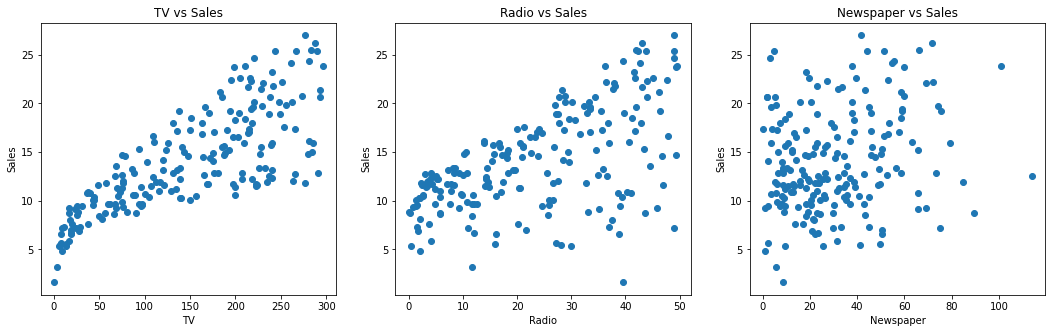

In [4]:
feature_columns = ['TV', 'Radio', 'Newspaper']
target_column = 'Sales'

plt_columns = [(feature_column, target_column) for feature_column in feature_columns]

fig, area = plt.subplots(1, len(plt_columns), figsize=(18, 5))

for i, item in enumerate(plt_columns):
    first, second = item
    area[i].scatter(df[first], df[second])
    area[i].set_title(f'{first} vs {second}')
    area[i].set_xlabel(first)
    area[i].set_ylabel(second)

In [5]:
features = df[feature_columns].to_numpy()
# I use pca here to convert my multicolumn feature dataset to 1-dimensional
x, _, _, _ = utils.pca(features, 1)
x = utils.normalize(x)
x = x.transpose()

y = df[target_column].to_numpy()

In [6]:
x = x.reshape(x.size, 1)
y = y.reshape(y.size, 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [7]:
lr = LinearRegression(x_train, y_train)

In [20]:
theta = lr.precompute()

In [21]:
multiplier, b = theta[1][0], theta[0][0]
print('Linear regression multiplier :', multiplier, ', b :', b)
print('Cost sse : ', lr.compute_cost())

Linear regression multiplier : 14.079819711720278 , b : 7.153919589568556
Cost sse :  5.674083905404681


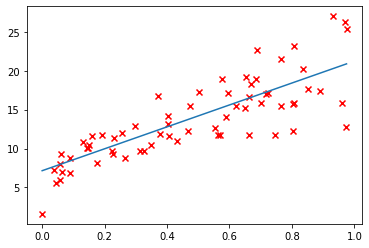

In [22]:
x_axis = np.linspace(x_test.min(), x_test.max(), 10000)
x_axis = x_axis.reshape(x_axis.size, 1)
plt.scatter(np.array(x_test), np.array(y_test), marker = 'x', color='r')
plt.plot(x_axis, x_axis * multiplier + b)
plt.show()

In [23]:
lr.r2_score(x_test, y_test)

0.6629509363086157